In [1]:
# imports some utilities ...

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_pesti.csv', index_col=[0])

## Let's vizualisate that

In [3]:
df.head()

,cat_label,111,112,121,122,123,124,131,133,141,...,311,312,313,322,324,331,412,423,511,512
0,3,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,0.0,0.0,0.0,...,271.303175,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0,8800.30667,0.0
1,3,0.000000,7607.874295,2.319998,0.0,0.0,0.0,0.0,0.0,0.0,...,1018.334103,1.467201e+03,2275.167150,0.0,0.000000,0.0,0.000000e+00,0.0,0.00000,0.0
2,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,196.193589,5.146666e+06,1701.143283,0.0,0.000000,0.0,8.187923e+02,0.0,0.00000,0.0
3,3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1024.849837,6.361784e+05,5512.222772,0.0,0.000000,0.0,2.574868e+03,0.0,0.00000,0.0
4,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,48862.652712,2.975520e+03,49.597455,0.0,917.672748,0.0,1.809062e+06,0.0,0.00000,0.0


In [4]:
df.shape

(57, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cat_label  57 non-null     int64  
 1   111        57 non-null     float64
 2   112        57 non-null     float64
 3   121        57 non-null     float64
 4   122        57 non-null     float64
 5   123        57 non-null     float64
 6   124        57 non-null     float64
 7   131        57 non-null     float64
 8   133        57 non-null     float64
 9   141        57 non-null     float64
 10  142        57 non-null     float64
 11  211        57 non-null     float64
 12  221        57 non-null     float64
 13  231        57 non-null     float64
 14  242        57 non-null     float64
 15  243        57 non-null     float64
 16  311        57 non-null     float64
 17  312        57 non-null     float64
 18  313        57 non-null     float64
 19  322        57 non-null     float64
 20  324        5

In [6]:
df.describe(include=['int64', 'float64'])
# df.describe(include=['int64', 'float64']).transpose()

,cat_label,111,112,121,122,123,124,131,133,141,...,311,312,313,322,324,331,412,423,511,512
count,57.000000,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,5.700000e+01,57.000000,57.000000,...,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,5.700000e+01,57.000000,57.000000,57.000000
mean,2.210526,389.289932,4.384149e+05,1.615709e+05,198.756957,35.163690,27.331065,2.599861e+04,9.194964,86.733773,...,1.894443e+05,1.021841e+05,7.696223e+04,75.900013,141.717429,22.399778,3.179747e+04,12.419478,226.420898,25.524836
std,1.760041,2049.678099,1.262078e+06,7.086092e+05,479.722186,239.816443,206.345017,1.583911e+05,49.116026,397.987523,...,7.882823e+05,6.852836e+05,5.773073e+05,373.905042,488.083768,120.038678,2.396083e+05,66.653643,1225.243534,107.609683
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.225678e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.029865e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,3.729843e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,3.000000,0.000000,7.328884e+03,5.337917e+02,65.325567,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.079474e+03,4.060461e+01,2.007079e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,6.000000,15107.362039,5.206697e+06,4.053755e+06,2509.438121,1802.939005,1557.870715,1.160708e+06,338.605936,2481.457626,...,3.672906e+06,5.146666e+06,4.359061e+06,2688.189175,2812.564594,741.986804,1.809062e+06,413.179539,8800.306670,631.183641


In [7]:
df['111'].value_counts()

0.000000        51
391.077976       1
209.227976       1
3098.057557      1
1967.704980      1
15107.362039     1
1416.095618      1
Name: 111, dtype: int64

In [8]:
df['412'].value_counts()

0.000000e+00    54
1.809062e+06     1
8.187923e+02     1
2.574868e+03     1
Name: 412, dtype: int64

<AxesSubplot:>

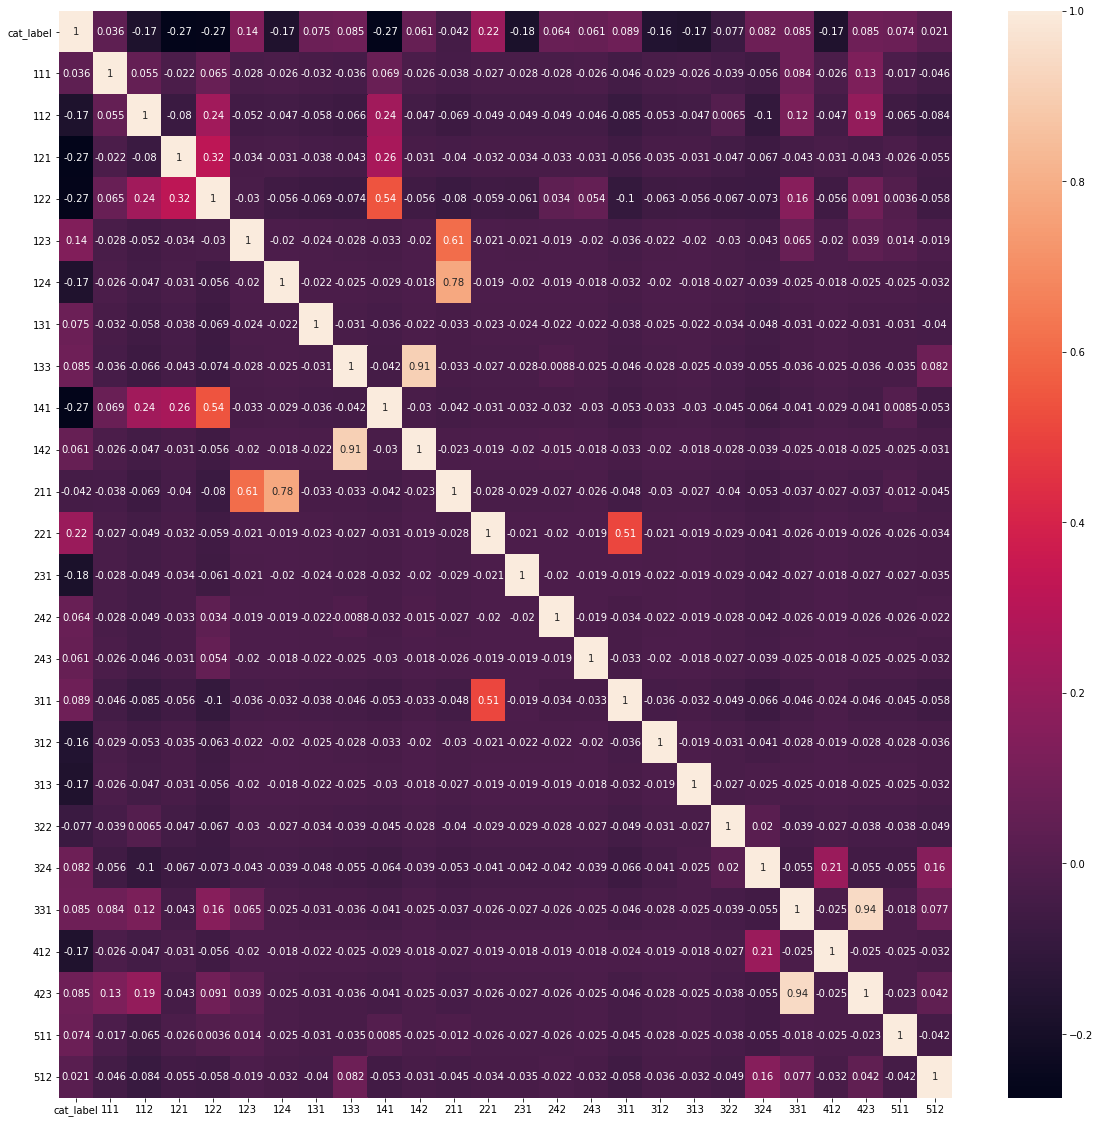

In [9]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,)

In [10]:
# import missingno as msno
# %matplotlib inline

# msno.matrix(df)

**On peux constater un cruel manque de données et un certains déséquilibre entre les valeurs cibles**( lmr_fungicides, lmr_insecticides, lmr_herbicides )

## Cleaning & spliting the dataset

In [11]:
X = df.drop(['cat_label'], axis=1)

In [12]:
X.head()

,111,112,121,122,123,124,131,133,141,142,...,311,312,313,322,324,331,412,423,511,512
0,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,271.303175,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0,8800.30667,0.0
1,0.000000,7607.874295,2.319998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1018.334103,1.467201e+03,2275.167150,0.0,0.000000,0.0,0.000000e+00,0.0,0.00000,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,196.193589,5.146666e+06,1701.143283,0.0,0.000000,0.0,8.187923e+02,0.0,0.00000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1024.849837,6.361784e+05,5512.222772,0.0,0.000000,0.0,2.574868e+03,0.0,0.00000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,159.015078,...,48862.652712,2.975520e+03,49.597455,0.0,917.672748,0.0,1.809062e+06,0.0,0.00000,0.0


In [13]:
y = df[['cat_label']]
y.head()

,cat_label
0,3
1,3
2,0
3,3
4,0


### Splitting

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [15]:

# y_train = np.expand_dims(y_train, axis=0)
# y_test = np.expand_dims(y_test, axis=0)

In [16]:
# indices = y_test
# depth = len(labels)
# y_test = np.expand_dims(y_test, axis=0)

In [17]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# with tf.device('/GPU:0'):

Num GPUs Available:  1


## CONFIG

In [18]:
INPUT_SIZE = X_train.shape[1]
EPOCHS = 600
LEARNING_RATE = 0.00001
OUTPUT_SIZE = 7
BATCH_SIZE = 1

In [19]:
print("INPUT_SIZE:", INPUT_SIZE)
print("EPOCHS:", EPOCHS)
print("LEARNING_RATE:", LEARNING_RATE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)
print("BATCH_SIZE:", BATCH_SIZE)

INPUT_SIZE: 25
EPOCHS: 600
LEARNING_RATE: 1e-05
OUTPUT_SIZE: 7
BATCH_SIZE: 1


## TRAINING

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([0.00000000e+00, 8.10102005e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.11300951e-04, 0.00000000e+00, 8.66458498e-01,
       0.00000000e+00, 7.22445012e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [21]:
X_train.shape

(51, 25)

In [22]:
y_train.shape

(51, 1)

In [23]:
y_test.shape

(6, 1)

In [24]:
X_test.shape

(6, 25)

### Using Deep Learning

In [25]:
model = models.Sequential()

model.add(layers.Dense(7, activation='relu', input_shape=(INPUT_SIZE,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(OUTPUT_SIZE, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 182       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 231       
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
with tf.device('/GPU:0'):

    history = model.fit(X_train, y_train, epochs=EPOCHS, 
                        validation_data=(X_test, y_test), batch_size=BATCH_SIZE)

Epoch 1/600
51/51 [==============================] - 2s 21ms/step - loss: 1.9589 - accuracy: 0.0098 - val_loss: 2.0573 - val_accuracy: 0.1667
Epoch 2/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9553 - accuracy: 0.0372 - val_loss: 2.0549 - val_accuracy: 0.1667
Epoch 3/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9527 - accuracy: 0.1290 - val_loss: 2.0518 - val_accuracy: 0.3333
Epoch 4/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9579 - accuracy: 0.2037 - val_loss: 2.0493 - val_accuracy: 0.3333
Epoch 5/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9506 - accuracy: 0.1503 - val_loss: 2.0468 - val_accuracy: 0.3333
Epoch 6/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9553 - accuracy: 0.1725 - val_loss: 2.0440 - val_accuracy: 0.3333
Epoch 7/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9502 - accuracy: 0.2396 - val_loss: 2.0417 - val_accuracy: 0.3333
Epoch 8/600


Epoch 59/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9115 - accuracy: 0.5067 - val_loss: 1.9199 - val_accuracy: 0.6667
Epoch 60/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9225 - accuracy: 0.4854 - val_loss: 1.9175 - val_accuracy: 0.6667
Epoch 61/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9099 - accuracy: 0.4704 - val_loss: 1.9151 - val_accuracy: 0.6667
Epoch 62/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9082 - accuracy: 0.4873 - val_loss: 1.9130 - val_accuracy: 0.6667
Epoch 63/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9039 - accuracy: 0.5468 - val_loss: 1.9108 - val_accuracy: 0.6667
Epoch 64/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9069 - accuracy: 0.4093 - val_loss: 1.9083 - val_accuracy: 0.6667
Epoch 65/600
51/51 [==============================] - 0s 4ms/step - loss: 1.9050 - accuracy: 0.4936 - val_loss: 1.9066 - val_accuracy: 0.6667
Epoch 

51/51 [==============================] - 0s 4ms/step - loss: 1.8483 - accuracy: 0.4985 - val_loss: 1.7630 - val_accuracy: 0.6667
Epoch 117/600
51/51 [==============================] - 0s 4ms/step - loss: 1.8386 - accuracy: 0.5177 - val_loss: 1.7599 - val_accuracy: 0.6667
Epoch 118/600
51/51 [==============================] - 0s 4ms/step - loss: 1.8319 - accuracy: 0.4813 - val_loss: 1.7569 - val_accuracy: 0.6667
Epoch 119/600
51/51 [==============================] - 0s 4ms/step - loss: 1.8552 - accuracy: 0.4118 - val_loss: 1.7533 - val_accuracy: 0.6667
Epoch 120/600
51/51 [==============================] - 0s 4ms/step - loss: 1.8557 - accuracy: 0.4609 - val_loss: 1.7503 - val_accuracy: 0.6667
Epoch 121/600
51/51 [==============================] - 0s 4ms/step - loss: 1.8378 - accuracy: 0.4787 - val_loss: 1.7470 - val_accuracy: 0.6667
Epoch 122/600
51/51 [==============================] - 0s 4ms/step - loss: 1.8356 - accuracy: 0.4556 - val_loss: 1.7435 - val_accuracy: 0.6667
Epoch 123/600

51/51 [==============================] - 0s 4ms/step - loss: 1.7650 - accuracy: 0.5003 - val_loss: 1.5824 - val_accuracy: 0.6667
Epoch 174/600
51/51 [==============================] - 0s 4ms/step - loss: 1.7442 - accuracy: 0.3770 - val_loss: 1.5791 - val_accuracy: 0.6667
Epoch 175/600
51/51 [==============================] - 0s 3ms/step - loss: 1.7613 - accuracy: 0.3873 - val_loss: 1.5762 - val_accuracy: 0.6667
Epoch 176/600
51/51 [==============================] - 0s 4ms/step - loss: 1.7774 - accuracy: 0.3262 - val_loss: 1.5733 - val_accuracy: 0.6667
Epoch 177/600
51/51 [==============================] - 0s 4ms/step - loss: 1.7288 - accuracy: 0.4792 - val_loss: 1.5704 - val_accuracy: 0.6667
Epoch 178/600
51/51 [==============================] - 0s 4ms/step - loss: 1.7355 - accuracy: 0.4394 - val_loss: 1.5672 - val_accuracy: 0.6667
Epoch 179/600
51/51 [==============================] - 0s 4ms/step - loss: 1.7483 - accuracy: 0.3729 - val_loss: 1.5644 - val_accuracy: 0.6667
Epoch 180/600

51/51 [==============================] - 0s 4ms/step - loss: 1.5706 - accuracy: 0.4782 - val_loss: 1.4311 - val_accuracy: 0.6667
Epoch 231/600
51/51 [==============================] - 0s 4ms/step - loss: 1.6091 - accuracy: 0.4943 - val_loss: 1.4289 - val_accuracy: 0.6667
Epoch 232/600
51/51 [==============================] - 0s 4ms/step - loss: 1.6024 - accuracy: 0.4772 - val_loss: 1.4262 - val_accuracy: 0.6667
Epoch 233/600
51/51 [==============================] - 0s 3ms/step - loss: 1.6315 - accuracy: 0.3978 - val_loss: 1.4239 - val_accuracy: 0.6667
Epoch 234/600
51/51 [==============================] - 0s 4ms/step - loss: 1.5600 - accuracy: 0.4659 - val_loss: 1.4216 - val_accuracy: 0.6667
Epoch 235/600
51/51 [==============================] - 0s 4ms/step - loss: 1.6683 - accuracy: 0.3738 - val_loss: 1.4191 - val_accuracy: 0.6667
Epoch 236/600
51/51 [==============================] - 0s 4ms/step - loss: 1.5602 - accuracy: 0.5426 - val_loss: 1.4168 - val_accuracy: 0.6667
Epoch 237/600

51/51 [==============================] - 0s 4ms/step - loss: 1.4116 - accuracy: 0.5150 - val_loss: 1.2987 - val_accuracy: 0.6667
Epoch 288/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4181 - accuracy: 0.5586 - val_loss: 1.2967 - val_accuracy: 0.6667
Epoch 289/600
51/51 [==============================] - 0s 4ms/step - loss: 1.5330 - accuracy: 0.3421 - val_loss: 1.2937 - val_accuracy: 0.6667
Epoch 290/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4664 - accuracy: 0.4765 - val_loss: 1.2918 - val_accuracy: 0.6667
Epoch 291/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3633 - accuracy: 0.6060 - val_loss: 1.2901 - val_accuracy: 0.6667
Epoch 292/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4239 - accuracy: 0.5346 - val_loss: 1.2874 - val_accuracy: 0.6667
Epoch 293/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4446 - accuracy: 0.5128 - val_loss: 1.2859 - val_accuracy: 0.6667
Epoch 294/600

51/51 [==============================] - 0s 4ms/step - loss: 1.4814 - accuracy: 0.4586 - val_loss: 1.1984 - val_accuracy: 0.6667
Epoch 345/600
51/51 [==============================] - 0s 4ms/step - loss: 1.2917 - accuracy: 0.5862 - val_loss: 1.1968 - val_accuracy: 0.6667
Epoch 346/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4603 - accuracy: 0.4288 - val_loss: 1.1952 - val_accuracy: 0.6667
Epoch 347/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3864 - accuracy: 0.4388 - val_loss: 1.1936 - val_accuracy: 0.6667
Epoch 348/600
51/51 [==============================] - 0s 4ms/step - loss: 1.2543 - accuracy: 0.5144 - val_loss: 1.1920 - val_accuracy: 0.6667
Epoch 349/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3720 - accuracy: 0.4027 - val_loss: 1.1912 - val_accuracy: 0.6667
Epoch 350/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4239 - accuracy: 0.4473 - val_loss: 1.1899 - val_accuracy: 0.6667
Epoch 351/600

51/51 [==============================] - 0s 4ms/step - loss: 1.3578 - accuracy: 0.4698 - val_loss: 1.1331 - val_accuracy: 0.8333
Epoch 402/600
51/51 [==============================] - 0s 4ms/step - loss: 1.2305 - accuracy: 0.4715 - val_loss: 1.1319 - val_accuracy: 0.8333
Epoch 403/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4262 - accuracy: 0.4147 - val_loss: 1.1312 - val_accuracy: 0.8333
Epoch 404/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3216 - accuracy: 0.4148 - val_loss: 1.1306 - val_accuracy: 0.8333
Epoch 405/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4113 - accuracy: 0.3417 - val_loss: 1.1296 - val_accuracy: 0.8333
Epoch 406/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3865 - accuracy: 0.4420 - val_loss: 1.1286 - val_accuracy: 0.8333
Epoch 407/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3740 - accuracy: 0.3963 - val_loss: 1.1276 - val_accuracy: 0.8333
Epoch 408/600

51/51 [==============================] - 0s 3ms/step - loss: 1.3650 - accuracy: 0.3835 - val_loss: 1.0885 - val_accuracy: 0.8333
Epoch 459/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3054 - accuracy: 0.3995 - val_loss: 1.0883 - val_accuracy: 0.8333
Epoch 460/600
51/51 [==============================] - 0s 4ms/step - loss: 1.2653 - accuracy: 0.4655 - val_loss: 1.0873 - val_accuracy: 0.8333
Epoch 461/600
51/51 [==============================] - ETA: 0s - loss: 1.2284 - accuracy: 0.55 - 0s 4ms/step - loss: 1.2457 - accuracy: 0.5266 - val_loss: 1.0864 - val_accuracy: 0.8333
Epoch 462/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3352 - accuracy: 0.3561 - val_loss: 1.0859 - val_accuracy: 0.8333
Epoch 463/600
51/51 [==============================] - 0s 4ms/step - loss: 1.1841 - accuracy: 0.4818 - val_loss: 1.0855 - val_accuracy: 0.8333
Epoch 464/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3310 - accuracy: 0.4157 - val_loss: 1

51/51 [==============================] - 0s 4ms/step - loss: 1.2772 - accuracy: 0.4548 - val_loss: 1.0530 - val_accuracy: 0.8333
Epoch 516/600
51/51 [==============================] - 0s 4ms/step - loss: 1.1932 - accuracy: 0.5216 - val_loss: 1.0527 - val_accuracy: 0.8333
Epoch 517/600
51/51 [==============================] - 0s 4ms/step - loss: 1.2380 - accuracy: 0.5857 - val_loss: 1.0521 - val_accuracy: 0.8333
Epoch 518/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4614 - accuracy: 0.4280 - val_loss: 1.0514 - val_accuracy: 0.8333
Epoch 519/600
51/51 [==============================] - 0s 4ms/step - loss: 1.5259 - accuracy: 0.3649 - val_loss: 1.0508 - val_accuracy: 0.8333
Epoch 520/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3346 - accuracy: 0.5320 - val_loss: 1.0506 - val_accuracy: 0.8333
Epoch 521/600
51/51 [==============================] - 0s 4ms/step - loss: 1.4492 - accuracy: 0.4658 - val_loss: 1.0500 - val_accuracy: 0.8333
Epoch 522/600

51/51 [==============================] - 0s 4ms/step - loss: 1.1707 - accuracy: 0.4836 - val_loss: 1.0278 - val_accuracy: 0.8333
Epoch 573/600
51/51 [==============================] - 0s 4ms/step - loss: 1.1811 - accuracy: 0.5941 - val_loss: 1.0274 - val_accuracy: 0.8333
Epoch 574/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3564 - accuracy: 0.4138 - val_loss: 1.0271 - val_accuracy: 0.8333
Epoch 575/600
51/51 [==============================] - 0s 4ms/step - loss: 1.2221 - accuracy: 0.4554 - val_loss: 1.0268 - val_accuracy: 0.8333
Epoch 576/600
51/51 [==============================] - 0s 4ms/step - loss: 1.1901 - accuracy: 0.5122 - val_loss: 1.0264 - val_accuracy: 0.8333
Epoch 577/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3692 - accuracy: 0.3835 - val_loss: 1.0260 - val_accuracy: 0.8333
Epoch 578/600
51/51 [==============================] - 0s 4ms/step - loss: 1.3900 - accuracy: 0.4598 - val_loss: 1.0256 - val_accuracy: 0.8333
Epoch 579/600

1/1 [==============================] - 0s 104ms/step - loss: 1.0187 - accuracy: 0.8333


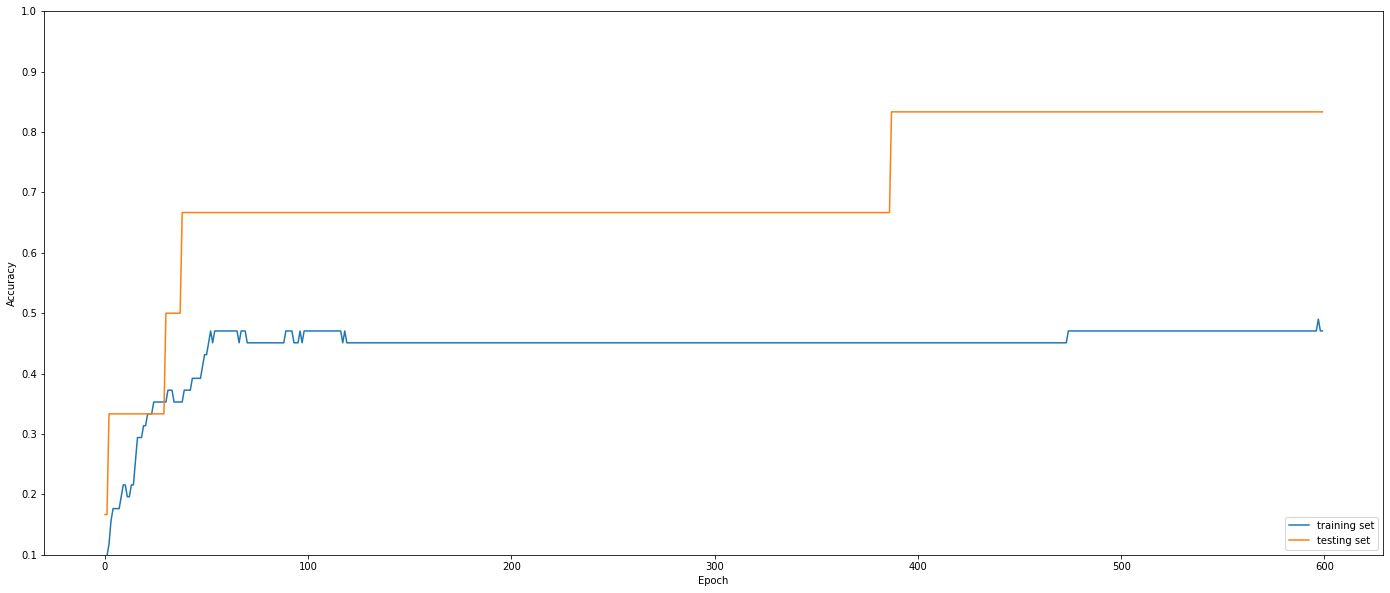

In [28]:
plt.figure(figsize=(24,10))
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test)

In [35]:
# model.save('biomodel.h5')

In [30]:
y_pred = model.predict(X_test)
y_pred

array([[4.4372359e-01, 5.7194289e-03, 2.3445620e-03, 5.3146875e-01,
        1.1800086e-03, 1.2669896e-02, 2.8937976e-03],
       [3.4236726e-01, 5.7378627e-02, 3.5890490e-02, 4.1466483e-01,
        2.6251499e-02, 8.6153589e-02, 3.7293658e-02],
       [8.4362155e-01, 1.0758854e-10, 1.1683983e-12, 1.5637846e-01,
        3.5998226e-14, 6.7198536e-10, 3.3003274e-11],
       [3.3973107e-01, 5.9326578e-02, 3.7157033e-02, 4.0987644e-01,
        2.7261512e-02, 8.7876499e-02, 3.8770821e-02],
       [3.5336813e-01, 4.7587443e-02, 2.9550901e-02, 4.4238555e-01,
        2.1268930e-02, 7.6163366e-02, 2.9675681e-02],
       [3.6831909e-01, 4.4893451e-02, 2.7404863e-02, 4.4913420e-01,
        1.7230468e-02, 6.5740630e-02, 2.7277332e-02]], dtype=float32)

In [31]:
y_pred.argmax(axis=1)

array([3, 3, 0, 3, 3, 3], dtype=int64)

In [32]:
# labels

In [33]:
# from tensorflow import keras
# model = keras.models.load_model('biomodel.h5')

Confusion Matrix


<AxesSubplot:>

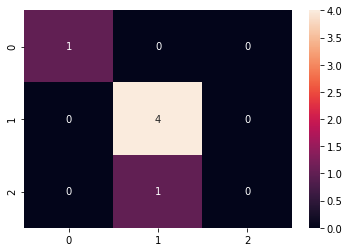

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Confution Matrix
y_pred = model.predict(X_test)

print('Confusion Matrix')
cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

sns.heatmap(cf_matrix, annot=True, fmt='g')